## Observations and Insights 

In this study, 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured

**Drug used for the study**
```
Capomulin
Ceftamin
Infubinol
Ketapril
Naftisol
Placebo
Propriva
Ramicane
Stelasyn
Zoniferol
```

**Below are the study result**
* Joining mouse data and study result together and filting out the duplicate entries
* Summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
* Bar plot showing the number of mice per time point for each treatment throughout the course of the study
* Pie plot showing the distribution of female versus male mice
* Four of the most promising treatment regimens and outliers

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
mouse_list = mouse_metadata['Mouse ID'].tolist()

In [4]:
mouse_metadata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [5]:
drug_index = mouse_metadata['Drug Regimen'].unique()

In [6]:
study_results.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [7]:
# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how ='inner')
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [8]:
len(combined_df['Mouse ID'])

1893

In [9]:
combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
combined_df.loc[combined_df['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouses = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicated_mouses

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop([861, 863, 865, 867, 869])

In [13]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'])

1888

In [14]:
clean_df.loc[clean_df['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
870,g989,25,56.045564,1,Propriva,Female,21,26
871,g989,30,59.082294,1,Propriva,Female,21,26
872,g989,35,62.570880,2,Propriva,Female,21,26


In [15]:
clean_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
tumer_vol_ergimen = clean_df.groupby(['Drug Regimen'])
mean_tumer = tumer_vol_ergimen['Tumor Volume (mm3)'].mean()
median_tumer = tumer_vol_ergimen['Tumor Volume (mm3)'].median()
variance_tumer = tumer_vol_ergimen['Tumor Volume (mm3)'].var()
std_tumer = tumer_vol_ergimen['Tumor Volume (mm3)'].std()
sem_tumer = tumer_vol_ergimen['Tumor Volume (mm3)'].sem()

stat_tumer = pd.DataFrame({'mean':mean_tumer, 
                           'median':median_tumer,
                           'var':variance_tumer,
                           'std':std_tumer,
                           'sem':sem_tumer
                          })

stat_tumer

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.
tumer_vol_agg = clean_df.groupby(['Drug Regimen']).agg(['mean', 'median', 'var', 'std', 'sem'])
tumer_vol_agg['Tumor Volume (mm3)']

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

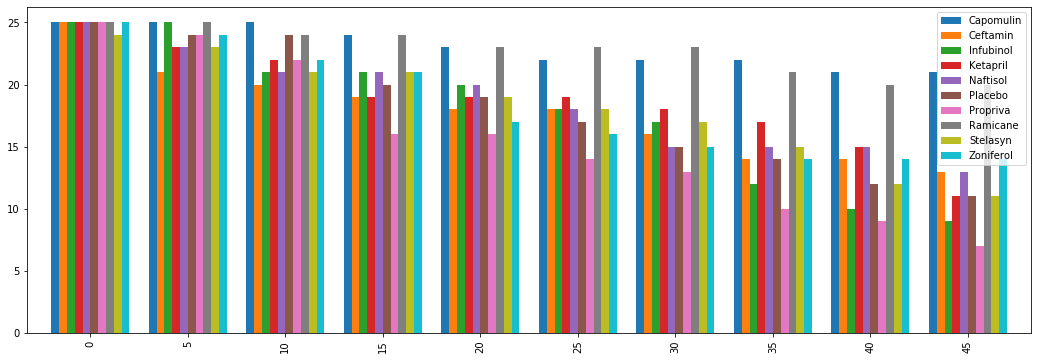

In [18]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout
# the course of the study using pandas.
index_x = [0, 5, 10, 15, 20, 25, 30,35, 40, 45]
bar_df = pd.DataFrame(clean_df.groupby(['Drug Regimen', 'Timepoint'])['Mouse ID'].count())
bar_df = bar_df.reset_index()

drug_type = bar_df['Drug Regimen'].unique()
timepoint_list = bar_df['Timepoint'].unique()
data_bar_dict = {}

for x in drug_type:
    data = bar_df.loc[bar_df['Drug Regimen'] == x]['Mouse ID'].tolist()
    data_bar_dict[x] = data
    
df = pd.DataFrame(data_bar_dict, index = index_x)
df.plot(kind = 'bar',width = .8, figsize = (18,6))

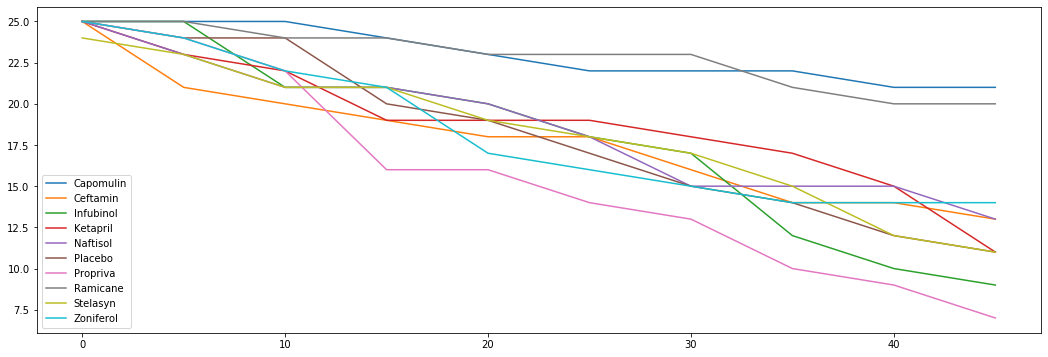

In [19]:
df.plot(kind = 'line', figsize = (18,6))

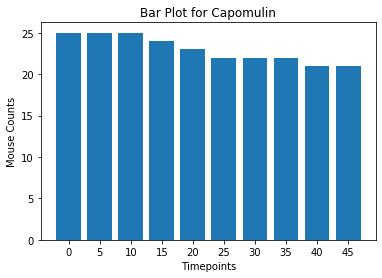

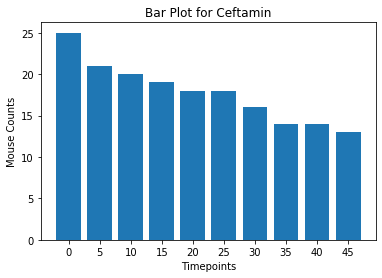

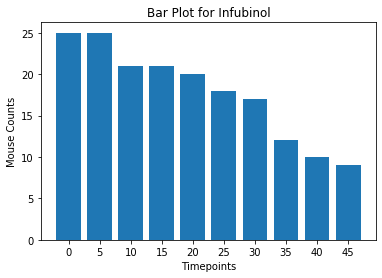

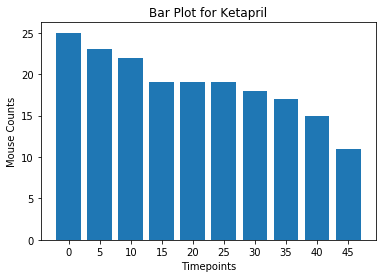

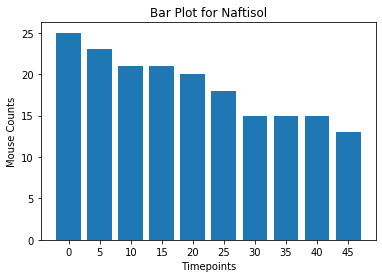

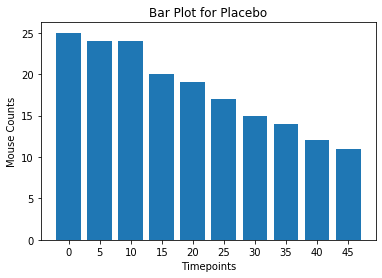

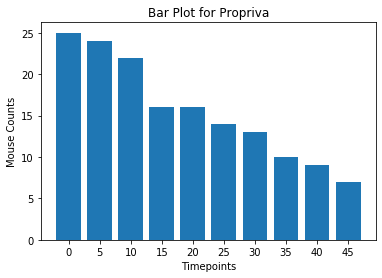

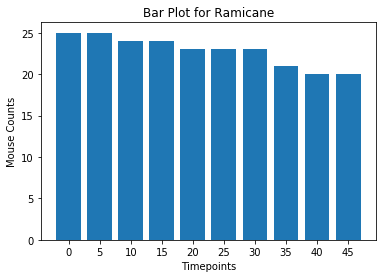

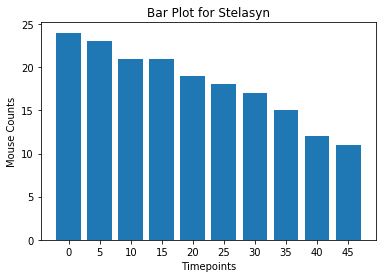

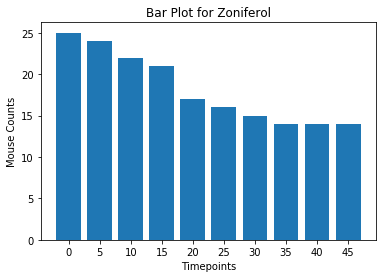

In [20]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the 
# course of the study using pyplot.


for drug, count_data in data_bar_dict.items():
    plt.figure(drug)
    plt.title(f'Bar Plot for {drug}')
    plt.xlabel('Timepoints')
    plt.ylabel('Mouse Counts')
    
    x_value = range(0, len(count_data))
    y_value = count_data
    plt.bar(x_value, y_value)
    plt.xticks(x_value, timepoint_list)
    plt.show()


## Pie Plots

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_df = pd.DataFrame(mouse_metadata.groupby(['Sex'])['Mouse ID'].count())
# pie_df = pie_df.reset_index()
pie_df

,Mouse ID
Sex,
Female,124
Male,125


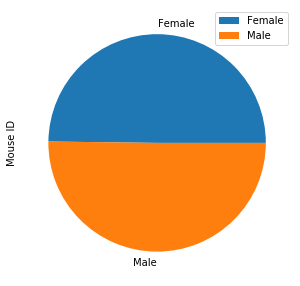

In [22]:
# Plot pie chart using dataframe
pie_df.plot(kind = 'pie', y = 'Mouse ID',figsize=(5, 5))

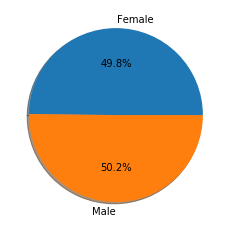

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_df = pie_df.reset_index()
sex_label = pie_df['Sex'].tolist()
sex_count = pie_df['Mouse ID'].tolist()
plt.pie(sex_count, labels = sex_label, autopct ="%1.1f%%", shadow=True)
plt.show()

## Quartiles, Outliers and Boxplots

### Four of the most promising treatment regimens

As the bar chart above shown, the Capomulin, Ramicane, Zoniferol, and Naftisol are able to keep the most of the mouse alive at the end of 45 days. They are considering the most promising treatment regimens.

In [35]:
treatment_df = clean_df.loc[clean_df['Timepoint'] == clean_df['Timepoint'].max()]
treatment_group_df = pd.DataFrame(treatment_df.groupby('Drug Regimen')['Tumor Volume (mm3)'])
treatment_group_df = treatment_group_df.rename(columns={0:'Drug Regimen', 1:'Tumor Volume (mm3)'})

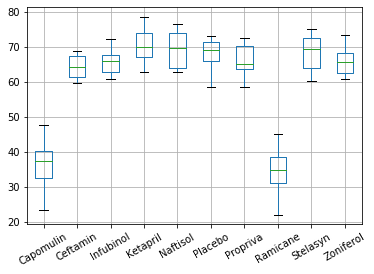

In [25]:
# Create the drug list
drug_list = treatment_group_df['Drug Regimen'].tolist()
drug_list

# Set the durg name as the index
treatment_group_df = treatment_group_df.set_index('Drug Regimen')
treatment_group_df

# Create the tumor list for all the frug
tumor_all_list = [treatment_group_df['Tumor Volume (mm3)'][index].tolist() for index in range(len(treatment_group_df['Tumor Volume (mm3)']))]

# Create a new dataframe for the different type of the drug and the final tumor size 
# final tumor size --> timepoint = 45 --> timepoint.max()
boxplot_df = pd.DataFrame(tumor_all_list, index = drug_list).transpose()
boxplot = boxplot_df.boxplot()
boxplot.set_xticklabels(drug_list,rotation=30)
boxplot

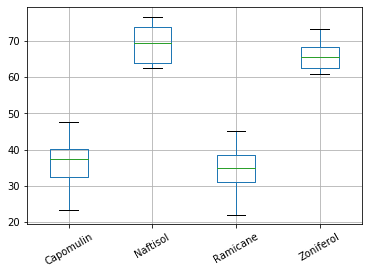

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
four_df = treatment_group_df.drop(['Ceftamin', 'Infubinol', 'Ketapril', 'Placebo', 'Propriva', 'Stelasyn'])
four_df = four_df.reset_index()

# Create the drug list
drug_list = four_df['Drug Regimen'].tolist()
drug_list

# Set the durg name as the index
four_df = four_df.set_index('Drug Regimen')
four_df

# Create the tumor list for all the frug
tumor_all_list = [four_df['Tumor Volume (mm3)'][index].tolist() for index in range(len(four_df['Tumor Volume (mm3)']))]

# Create boxplot only for the four regimens
df = pd.DataFrame(tumor_all_list, index = drug_list).transpose()
boxplot = df.boxplot()
boxplot.set_xticklabels(drug_list,rotation=30)
boxplot

### Serarching for Capmulin outliers

In [28]:
capomulin_data = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']

quartiles = capomulin_data.quantile(q=[.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

outlier = capomulin_data.loc[(capomulin_data < lower_bound) | (capomulin_data > upper_bound)]

if(len(outlier) > 0):
    print(f'Capomulin outliers: {outlier.tolist()}')
else:
    print('Capomulin does not have outlier')

Capomulin outliers: [25.47214326, 23.34359787]


### Serarching for Naftisol outliers

In [29]:
naftisol_data = clean_df.loc[clean_df['Drug Regimen'] == 'Naftisol']['Tumor Volume (mm3)']
quartiles = naftisol_data.quantile(q=[.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

outlier = naftisol_data.loc[(naftisol_data < lower_bound) | (naftisol_data > upper_bound)]

if(len(outlier) > 0):
    print(f'Naftisol outliers: {outlier.tolist()}')
else:
    print('Naftisol does not have outlier')

Naftisol does not have outlier


### Serarching for Ramicane outliers

In [30]:
ramicane_data = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
quartiles = ramicane_data.quantile(q=[.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

outlier = ramicane_data.loc[(ramicane_data < lower_bound) | (ramicane_data > upper_bound)]

if(len(outlier) > 0):
    print(f'Ramicane outliers: {outlier.tolist()}')
else:
    print('Ramicane does not have outlier')

Ramicane outliers: [22.05012627]


### Serarching for Zoniferol outliers

In [31]:
zoniferol_data = clean_df.loc[clean_df['Drug Regimen'] == 'Zoniferol']['Tumor Volume (mm3)']
quartiles = zoniferol_data.quantile(q=[.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

outlier = zoniferol_data.loc[(zoniferol_data < lower_bound) | (zoniferol_data > upper_bound)]

if(len(outlier) > 0):
    print(f'Zoniferol outliers: {outlier.tolist()}')
else:
    print('Zoniferol does not have outlier')

Zoniferol does not have outlier


## Line and Scatter Plots

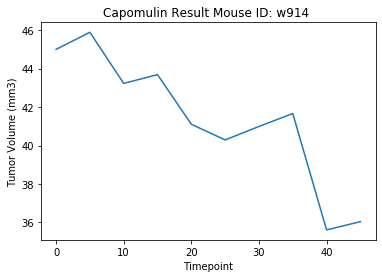

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
regimens_bool = clean_df['Drug Regimen'] == 'Capomulin'
mouse = 'w914'
line_df = clean_df.loc[regimens_bool]
w914_data = line_df.loc[line_df['Mouse ID'] == mouse]
plt.plot(w914_data['Timepoint'], w914_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Result Mouse ID: w914 ')
plt.show()

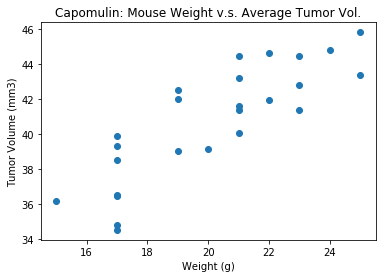

In [33]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_data = clean_df.loc[regimens_bool]
ave_tumor_vol_df = cap_data.groupby(['Mouse ID']).mean()


plt.scatter(ave_tumor_vol_df['Weight (g)'], ave_tumor_vol_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin: Mouse Weight v.s. Average Tumor Vol.')
plt.show()

## Correlation and Regression

R squared: 0.7088568047708717


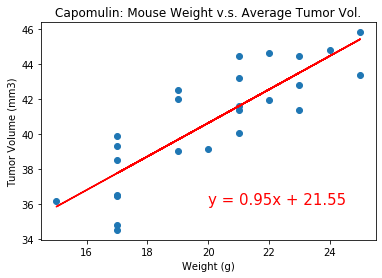

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = ave_tumor_vol_df['Weight (g)'].astype('float')
y_values = ave_tumor_vol_df['Tumor Volume (mm3)'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

# Label plot
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin: Mouse Weight v.s. Average Tumor Vol.')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()